<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
# Cargar datos
path = "D:/Especializacion/NLP/Archivos taller 7-20210422/reviews_vidjew_es.csv"
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [4]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")


Tamaño de X_train (entrenamiento): (800, 3221)
Tamaño de X_test (prueba): (200, 3221)
Tamaño de y_train 800 y tamaño de y_test 200


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [3]:

import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')


def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [5]:
# Inicializar los clasificadores
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [8]:
#Exactitud
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
#metricas = [precision_score, recall_score, f1_score]
print(f"Regresión Logística: {precision_score(y_test, y_pred_logreg, pos_label='jewelry'):7.2f}")
print(f"Regresión Logística: {recall_score(y_test, y_pred_logreg, pos_label='jewelry'):7.2f}")
print(f"Regresión Logística: {f1_score(y_test, y_pred_logreg, pos_label='jewelry'):7.2f}")

Regresión Logística:    0.86
Regresión Logística:    0.86
Regresión Logística:    0.86
Regresión Logística:    0.86


###  `[BONUS: 3 pts]` Matriz de confusión

Text(0.5, 1.0, 'Regresión Logística')

<Figure size 720x720 with 0 Axes>

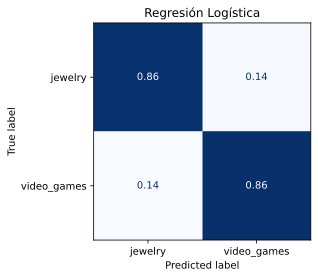

In [13]:
confusion_matrix(y_test, y_pred_logreg)
%config InlineBackend.figure_format = 'svg'
fig = plt.figure(figsize=(10,10))
plot_confusion_matrix(logreg, X_test, y_test, cmap="Blues", normalize='true').im_.colorbar.remove()
plt.title("Regresión Logística")

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [18]:

# Las palabras que contribuyen a la clase 0
[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(), sorted(logreg.coef_[0]))][:10]



# Las palabras que contribuyen a la clase 1
[(vocab[e[0]], round(e[1],2)) for e in zip(logreg.coef_[0].argsort(), sorted(logreg.coef_[0]))][-10:]


[('cable', 0.99),
 ('botones', 1.01),
 ('consola', 1.13),
 ('hijo', 1.18),
 ('funciona', 1.2),
 ('ps', 1.26),
 ('jugar', 1.36),
 ('perfecto', 1.36),
 ('mando', 1.94),
 ('juego', 3.61)]

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?